## Problem statement:
A house value is simply more than location and square footage. Like the features that make 
up a person, an educated party would want to know all aspects that give a house its value. 
For example, you want to sell a house and you don’t know the price which you can take — it 
can’t be too low or too high. To find house price you usually try to find similar properties in
 your neighbourhood and based on gathered data you will try to assess your house price.


## Variable Description
1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might
or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room 23: total_area: Measure of both living and lot

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("innercity.csv")

FileNotFoundError: ignored

In [ ]:
df.head(10)

In [ ]:
df.info()

* 4 features are of float type

* 18 features are of integer type

* 1 feature is of object type (we may need to convert this object type to specific datatype

In [ ]:
df.nunique()

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe().transpose()


We don't have any duplicate record in out dataset.

1.	cid: House ID/Property ID.Not used for analysis

2.	dayhours: 5 factor analysis is reflecting for this column

3.	price: Our taget column value is in 75000 - 7700000 range. As Mean greater than Median, it's Right-Skewed.

4.	room_bed: Number of bedrooms range from 0 - 33. As Mean slightly greater than Median, it's slightly Right-Skewed.

5.	room_bath: Number of bathrooms range from 0 - 8. As Mean litle less than Median, it's slightly Left-Skewed.

6.	living_measure: Square footage of house range from 290 - 13,540. As Mean greater than Median, it's Right-Skewed.

7.	lot_measure: Square footage of lot range from 520 - 1651359. As Mean almost double of Median, it's Hightly Right-Skewed.

8.	ceil: Number of floors range from 1 - 3.5 As Mean ~ Median, it's almost Normal Distributed.

9.	coast: As this value represent whether house has waterfront view or not. It's categorical column. From above analysis we got know, very few houses has waterfront view.

10.	sight: Value ranges from 0 - 4. As Mean > Median, it's Right-Skewed

11.	condition: Represents rating of house which ranges from 1 - 5.0 As Mean > Median, it's Right-Skewed

12.	quality: Representign grade given to house which range from 1 - 13. As Mean > Median, it's Right-Skewed.

13.	ceil_measure: Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's Right-Skewed.

14.	basement: Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's Highly Right-Skewed.

15.	zipcode: House ZipCode ranges from 98001 - 98199. As Mean > Median, it's Right-Skewed.

16.	lat: Lattitude ranges from 47.1559 - 47.7776 As Mean less than Median, it's Left-Skewed.

17.	long: Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's Right-Skewed.

18.	living_measure15: Value ragnes from 399 to 6,210. As Mean > Median, it's Right-Skewed.

19.	lot_measure15: Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's Highly Right-Skewed.

20.	yr_built: House built year ranges from 1900 - 2015. As Mean < Median, it's Left-Skewed.

21.	yr_renovated: House renovation year only 2015. So this column can be used as Categorical Variable for knowing whether house is renovated or not.

22.	furnished: Representing whether house is furnished or not. It's a Categorical Variable

23.	total_area Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's Highly Right-Skewed



## EXPLORATORY DATA ANALYSIS

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
for i in df.iloc[:, 2:].columns:
    df.iloc[:, 1:].boxplot(column=i)
    plt.show()

Most of the columns have outliers in them.

> Indented block



dayofhour

In [ ]:
df_o=df.copy()
df.dayhours=df.dayhours.str.replace('T000000', "")
df.dayhours=pd.to_datetime(df.dayhours,format='%Y%m%d')
df['month_year']=df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
df['month_year'].head()

We successfully converted dayhours feature to month_year for better analysis.

In [ ]:
df['month_year'].value_counts()

The code below displays the average price of the house over the months of a year

In [ ]:
df.groupby(['month_year'])['price'].mean()

price

In [ ]:
plt.figure(figsize=(9, 9))
sns.distplot(df['price'])

room_bed

In [ ]:
df['room_bed'].value_counts()

since we have variable distribution of the bedrooms in a house 11 and 10 room_bed values may be outliers

In [ ]:
plt.figure(figsize=(9, 9))
sns.countplot(y=df.room_bed ,data=df);

room_bath

In [ ]:
plt.figure(figsize=(9, 9))
sns.countplot(y=df.room_bath ,data=df,order=df['room_bath'].value_counts().index)

 Living measure

In [ ]:
sns.distplot(df.living_measure)
df.living_measure.describe()

In [ ]:
sns.boxplot(df.living_measure)

lot_measure

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df.lot_measure)
df.lot_measure.describe()

ceil

In [ ]:
df.ceil.value_counts()

most of the apartments have one floor

In [ ]:
sns.countplot('ceil',data=df ,order=df['ceil'].value_counts().index)

coast

In [ ]:
df.columns

sight

In [ ]:
df.sight.value_counts()

In [ ]:
sns.countplot('sight',data=df ,order=df['sight'].value_counts().index)

condition

In [ ]:
df.condition.value_counts()

In [ ]:
sns.countplot('condition',data=df ,order=df['condition'].value_counts().index)

quality

In [ ]:
print(df.quality.value_counts())

sns.countplot('quality',data=df ,order=df['quality'].value_counts().index)

ceil_measure

In [ ]:
print(df.ceil_measure.value_counts())

sns.distplot(df['ceil_measure'] )

basement

In [ ]:
print(df.basement.value_counts())

sns.distplot(df['basement'])

In [ ]:
zero_base=df[df.basement==0].shape[0]
p=zero_base/len(df)
print("percentage of houses without basement", p*100)

yr_built

In [ ]:
sns.distplot(df.yr_built)

The built year of the houses range from 1900 to 2014 and we can see increasing trend with time

yr_renovated

In [ ]:
sns.distplot(df.yr_renovated)

zipcode

In [ ]:
plt.hist(df.zipcode)

living_measure15

In [ ]:
sns.distplot(df.living_measure15)

lot_measure15

In [ ]:
sns.distplot(df.lot_measure15)

furnished

In [ ]:
sns.countplot(df.furnished)

total_area

In [ ]:
sns.distplot(df.total_area)

zipcode

## Bivariate

<Figure size 1080x720 with 0 Axes>

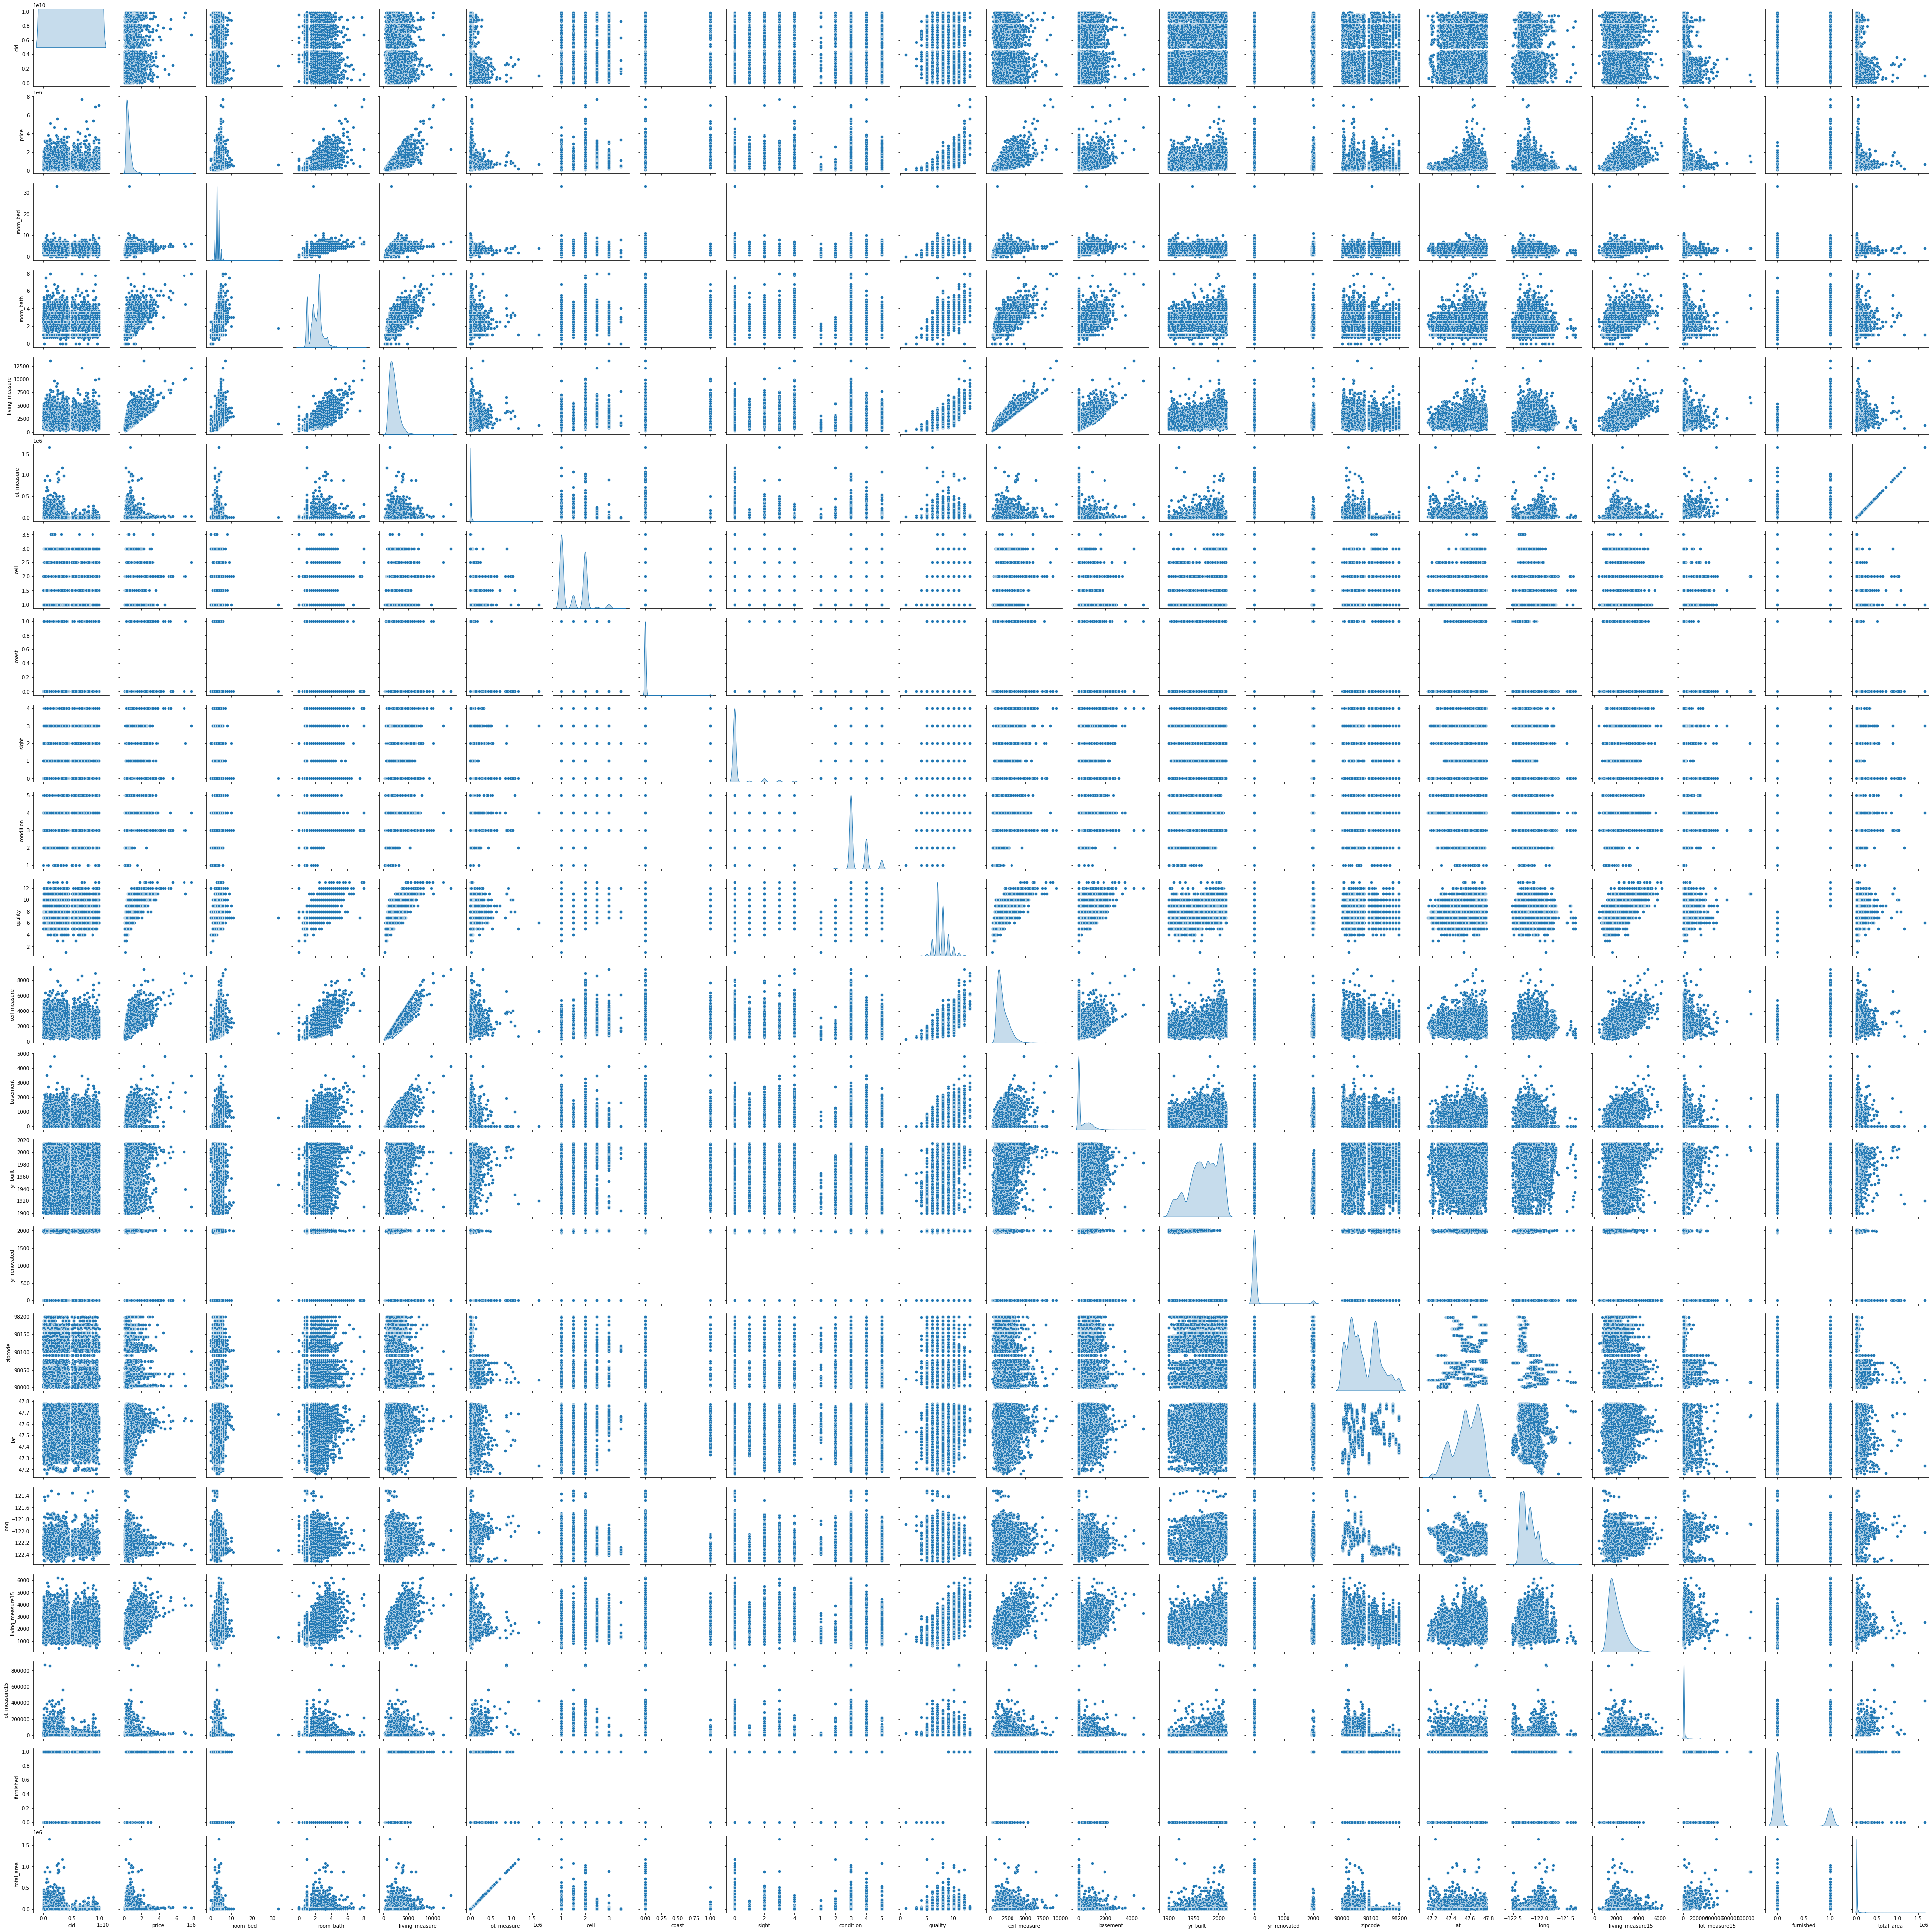

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df, diag_kind = 'kde')

columns with linear relation:

price: room_bath, living_measure, quality, living_measure15, furnished

living_measure: price, room_bath. 

quality: price, room_bath, living_measure

ceil_measure: price, room_bath, living_measure, quality

living_measure15: price, living_measure, quality. So we can consider dropping 

living_measure15 as well. As it's giving same info as living_measure.

lot_measure15: lot_measure. Therefore, we drop  lot_measure15 beacause its referring to almost the same features


furnished: quality

total_area: lot_measure, lot_measure15.  drop
total_area feature as well beacuase it is referrring to the same feature = lot_measure


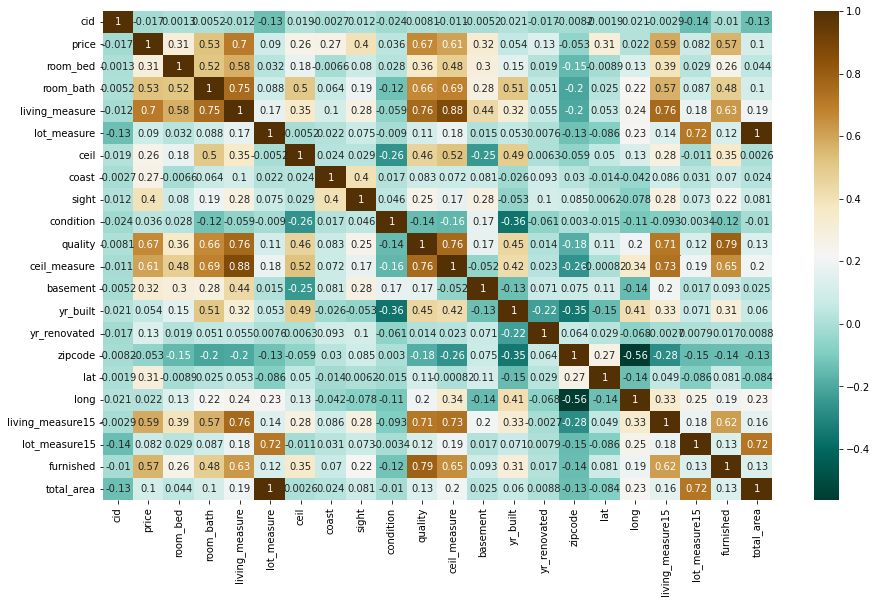

In [ ]:
corr = df.corr(method ='pearson')
plt.subplots(figsize =(15, 9)) 
sns.heatmap(corr,cmap="BrBG_r",annot=True)


basement vs price

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: basement, dtype: float64

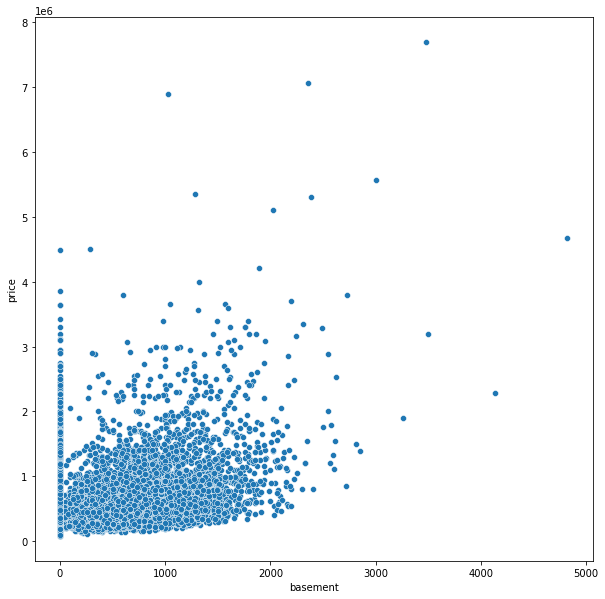

In [ ]:
plt.figure(figsize=(10, 10))
print(sns.scatterplot(df['basement'],df['price']))
df['basement'].describe()

In [ ]:
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['has_basement'] = df['basement'].apply(create_basement_group)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


price                living_measure              
                       mean  median   size           mean median   size
has_basement                                                           
No            486945.394789  411500  13126    1928.879628   1740  13126
Yes           622518.174384  515000   8487    2313.467539   2100   8487

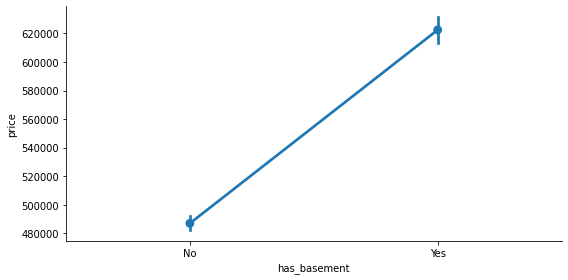

In [ ]:
print(sns.factorplot(x='has_basement',y='price',data=df, size = 4, aspect = 2))
df.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

price evidently increases with increase in the number of basement in a house therefore it affects the price directly

In [ ]:
df["House_land_r"]=np.round((df['living_measure']/df['total_area']),2)*100
df["House_land_r"].head()

0    18.0
1    25.0
2    35.0
3    18.0
4    26.0
Name: House_land_r, dtype: float64

yr_renovated

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


price                House_land_r              
                        mean  median   size         mean median   size
has_renovated                                                         
No             530447.958597  448000  20699    22.067056   20.0  20699
Yes            760628.777899  600000    914    22.296499   21.0    914

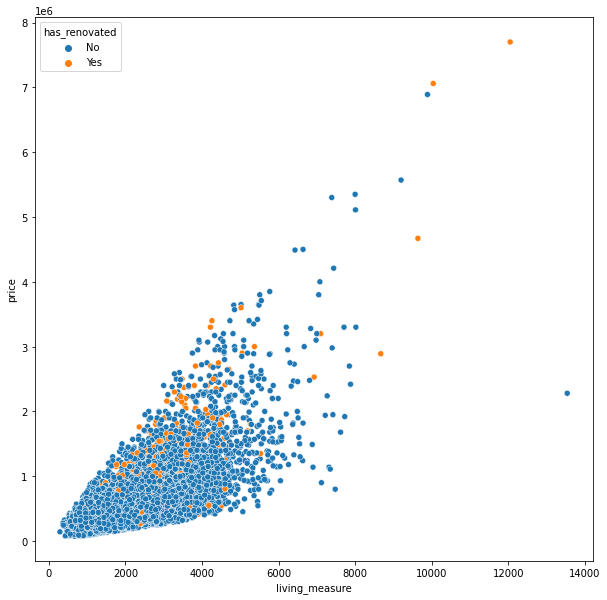

In [ ]:
def create_renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['has_renovated'] = df['yr_renovated'].apply(create_renovated_group)#actually increased or not.

plt.figure(figsize=(10, 10))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['has_renovated']))
#groupby
df.groupby(['has_renovated'])['price','House_land_r'].agg(['mean','median','size'])

Renovated properties have higher price than others with same living_measure space.

## feature engineering

outlier treatement

In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

columns with outlier 

*  ceil_measure
*  basement 
*  living_measure
*  lot_measure

ceil measure

In [ ]:
lowerbound,upperbound = outlier_treatment(df.ceil_measure)
print(lowerbound,upperbound)

-340.0 3740.0


In [ ]:
df.drop(df[ (df.ceil_measure > upperbound) | (df.ceil_measure < lowerbound) ].index, inplace=True)

basement

In [ ]:
lowerbound_base,upperbound_base = outlier_treatment(df.basement)
print(lowerbound_base,upperbound_base)

-855.0 1425.0


In [ ]:
df.drop(df[ (df.basement > upperbound_base) | (df.basement < lowerbound_base) ].index, inplace=True)

living_measure

In [ ]:
lowerbound_lim,upperbound_lim = outlier_treatment(df.living_measure)
print(lowerbound_lim,upperbound_lim)

-160.0 4000.0


In [ ]:
df.drop(df[ (df.living_measure > upperbound_lim) | (df.living_measure < lowerbound_lim) ].index, inplace=True)

lot_measure

In [ ]:
lowerbound_lom,upperbound_lom = outlier_treatment(df.lot_measure)
print(lowerbound_lom,upperbound_lom)

-2774.875 17958.125


In [ ]:
df.drop(df[ (df.lot_measure > upperbound_lom) | (df.lot_measure < lowerbound_lom) ].index, inplace=True)

room_bed

In [ ]:
df.drop(df[ (df.room_bed == 33) ].index, inplace=True)

In [ ]:
print("perentage of data loss",((len(df_o)-df.shape[0])/len(df_o))*100)

perentage of data loss 15.38888631841947


dropping unwanted features

In [ ]:
#Dropping the feature not required in 1st Iteration
df_final=df.drop(['cid','dayhours','yr_renovated','lat','long'],axis=1)

In [ ]:
dff = pd.get_dummies(df_final, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished','zipcode', 
                                        'has_basement', 'has_renovated'],drop_first=True)

In [ ]:
dff.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'total_area',
       'month_year',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'has_basement_Yes', 'has_renovated_Yes'],
      dtype='object', length=138)

In [ ]:
#let's drop the month_year column as we already analyzed it
dff=dff.drop(['month_year'],axis=1)

In [ ]:
X = dff.drop("price" , axis=1)
y = dff["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(11703, 136)
(3658, 136)
(2926, 136)


In [ ]:
dff.head()

price  living_measure  ...  has_basement_Yes  has_renovated_Yes
0  808100            3020  ...                 0                  0
1  277500            2550  ...                 1                  0
2  404000            2370  ...                 0                  0
3  300000             820  ...                 0                  0
4  699000            1400  ...                 0                  0

[5 rows x 137 columns]

# Model building

Let's build the model and see their performances

### Linear Regression (with Ridge and Lasso)

In [ ]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
#predicting result over test data
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_val)

LR1.coef_

array([ 1.54357470e+10,  1.72192080e+13,  1.72037722e+13,  1.72037722e+13,
       -1.21367537e+02,  2.07199888e+01, -2.38074884e-01, -1.72192080e+13,
       -3.36710598e+03, -2.03497065e+04,  1.80625296e+04,  2.38718201e+04,
        1.43291413e+04,  7.52156845e+03, -1.58122931e+04, -1.16264899e+05,
       -8.22501117e+04,  3.63490210e+04, -6.85715903e+04, -1.76034065e+04,
       -9.71363449e+04, -1.11049884e+05, -7.71226401e+04, -9.97990202e+04,
       -7.12836877e+04, -7.09519856e+04, -7.14550918e+04, -5.28611225e+04,
       -6.13911038e+04, -5.56344821e+04, -4.84176402e+04,  4.17230045e+03,
       -2.23249651e+04,  4.90157322e+04, -5.22242037e+04, -4.13710420e+04,
       -1.26782680e+05,  5.02166976e+05, -6.35513706e+04, -2.87369968e+04,
       -1.93038468e+05,  8.61671191e+03, -1.45016797e+03,  3.10664648e+04,
       -1.67003613e+03,  4.79775540e+04,  3.61817294e+05,  7.13662512e+04,
        7.20920330e+04,  1.50594315e+05,  3.00408308e+05,  1.26603245e+05,
        1.43773804e+05,  

In [ ]:
#Model score and Deduction for each Model in a DataFrame
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

LR1_vlscore=r2_score(y_val,y_LR1_predvl)
LR1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
LR1_vlMSE=mean_squared_error(y_val, y_LR1_predvl)
LR1_vlMAE=mean_absolute_error(y_val, y_LR1_predvl)

Compa_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Val Score':LR1_vlscore,'RMSE_vl': LR1_vlRMSE, 'MSE_vl': LR1_vlMSE, 'MAE_vl': LR1_vlMAE,'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE, 'MSE_tr': LR1_trMSE, 'MAE_tr': LR1_trMAE})

#Compa_df = Compa_df[['Method', 'Test Score', 'RMSE', 'MSE', 'MAE']]

Compa_df

Method  Val Score  ...        MSE_tr        MAE_tr
0  Linear Reg Model1   0.830726  ...  1.044775e+10  68568.078133

[1 rows x 9 columns]

The linear regression model performed with scores 0.73 & .72 in training data set and validation data set respectively

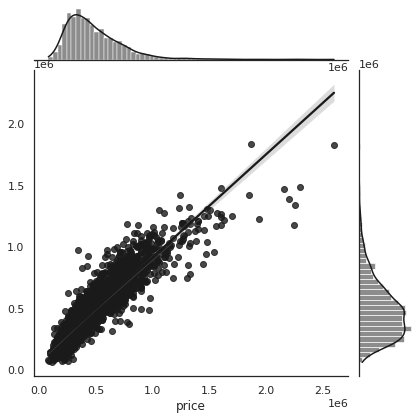

In [ ]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_LR1_predvl, kind="reg", color="k")

#### Lasso model

In [ ]:
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)

#predicting result over test data
y_Lasso1_predtr= Lasso1.predict(X_train)
y_Lasso1_predvl= Lasso1.predict(X_val)

Lasso1.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.953e+13, tolerance: 7.622e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 1.34320021e+02, -3.35985636e+00,  1.56228507e+01, -3.14471899e+01,
       -1.27311441e+02,  2.07711213e+01, -2.44190479e-01, -1.40961143e+00,
       -3.35479341e+03, -3.39426584e+04,  3.76602015e+03,  9.55141958e+03,
        0.00000000e+00, -6.73025871e+03, -2.99986539e+04, -1.30508470e+05,
       -9.41589797e+04,  1.85269212e+04, -7.09219664e+04, -2.00517709e+04,
       -4.46228152e+04, -5.76931831e+04, -2.74316415e+04, -4.84720598e+04,
       -2.16449094e+04, -2.12847258e+04, -2.18329735e+04, -3.20951394e+03,
       -1.17962045e+04, -5.99690956e+03,  1.13491623e+03,  5.38573196e+04,
        2.73318486e+04,  9.85247122e+04, -2.18680058e+03,  6.96962412e+03,
       -7.59506957e+04,  5.45875764e+05, -7.59244227e+03,  1.50553983e+04,
       -1.31583060e+05,  8.54412150e+03, -1.43208173e+03,  3.08115235e+04,
       -1.44849021e+03,  5.39895655e+04,  3.61077140e+05,  7.12908730e+04,
        7.21807775e+04,  1.50430038e+05,  3.00279769e+05,  1.20227878e+05,
        1.37653145e+05,  

In [ ]:
#Model score and Deduction for each Model in a DataFrame
Lasso1_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)

Lasso1_vlscore=r2_score(y_val,y_Lasso1_predvl)
Lasso1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso1_vlMSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso1_vlMAE=mean_absolute_error(y_val, y_Lasso1_predvl)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Val Score':Lasso1_vlscore,'RMSE_vl': Lasso1_vlRMSE, 'MSE_vl': Lasso1_vlMSE, 'MAE_vl': Lasso1_vlMAE,'train Score':Lasso1_trscore,'RMSE_tr': Lasso1_trRMSE, 'MSE_tr': Lasso1_trMSE, 'MAE_tr': Lasso1_trMAE})
Compa_df = pd.concat([Compa_df, Lasso1_df])

Compa_df

Method  Val Score  ...        MSE_tr        MAE_tr
0  Linear Reg Model1   0.830726  ...  1.044775e+10  68568.078133
0  Linear-Reg Lasso1   0.830747  ...  1.044950e+10  68571.404793

[2 rows x 9 columns]

The lasso linear regression model performed with scores 0.73 & .72 in training data set and validation data set respectively. The coefficeints of 1 variable in lasso model is almost '0', signifying that the variable with '0' coefficient can be dropped.

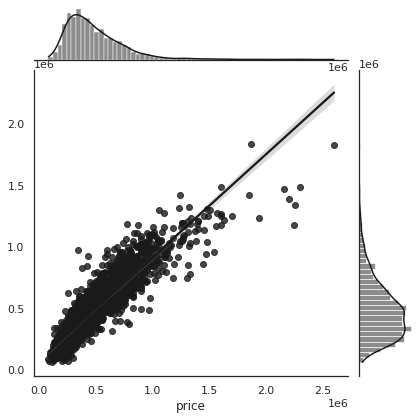

In [ ]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_Lasso1_predvl, kind="reg", color="k")

#### Ridge model

In [ ]:
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train)

#predicting result over test data
y_Ridge1_predtr= Ridge1.predict(X_train)
y_Ridge1_predvl= Ridge1.predict(X_val)

Ridge1.coef_

array([ 6.34606434e+01, -3.40869988e+01,  5.52210357e+01,  8.24020266e+00,
       -1.73763203e+02,  2.13508158e+01, -2.88613851e-01,  2.93705760e+01,
       -3.26219555e+03, -1.70744002e+04,  2.13281055e+04,  2.66436439e+04,
        1.67767808e+04,  1.01869536e+04, -1.34706527e+04, -1.13115995e+05,
       -7.18634994e+04,  3.24987448e+04, -4.32837075e+04, -1.11872676e+04,
       -5.80740928e+04, -7.41167801e+04, -4.47169094e+04, -6.18282447e+04,
       -3.91065934e+04, -3.87139836e+04, -3.94215123e+04, -2.06644255e+04,
       -2.96731898e+04, -2.36250832e+04, -1.63657732e+04,  3.79563015e+04,
        1.00220367e+04,  8.11113125e+04, -1.96271214e+04, -8.62286216e+03,
       -9.01661949e+04,  4.26165033e+05, -2.22451267e+04,  2.97006819e+03,
       -1.08347438e+05,  8.45881367e+03, -1.29946613e+03,  3.01244068e+04,
       -4.25899903e+02,  5.17460840e+04,  3.55932083e+05,  7.13021518e+04,
        7.25958216e+04,  1.49217393e+05,  2.99414917e+05,  1.02048901e+05,
        1.20714425e+05,  

In [ ]:
#Model score and Deduction for each Model in a DataFrame
Ridge1_trscore=r2_score(y_train,y_Ridge1_predtr)
Ridge1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
Ridge1_trMSE=mean_squared_error(y_train, y_Ridge1_predtr)
Ridge1_trMAE=mean_absolute_error(y_train, y_Ridge1_predtr)

Ridge1_vlscore=r2_score(y_val,y_Ridge1_predvl)
Ridge1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Ridge1_predvl))
Ridge1_vlMSE=mean_squared_error(y_val, y_Ridge1_predvl)
Ridge1_vlMAE=mean_absolute_error(y_val, y_Ridge1_predvl)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Val Score':Ridge1_vlscore,'RMSE_vl': Ridge1_vlRMSE, 'MSE_vl': Ridge1_vlMSE, 'MAE_vl': Ridge1_vlMAE,'train Score':Ridge1_trscore,'RMSE_tr': Ridge1_trRMSE, 'MSE_tr': Ridge1_trMSE, 'MAE_tr': Ridge1_trMAE})
Compa_df = pd.concat([Compa_df, Ridge1_df])

Compa_df

Method  Val Score  ...        MSE_tr        MAE_tr
0  Linear Reg Model1   0.830726  ...  1.044775e+10  68568.078133
0  Linear-Reg Lasso1   0.830747  ...  1.044950e+10  68571.404793
0  Linear-Reg Ridge1   0.830366  ...  1.047479e+10  68663.330987

[3 rows x 9 columns]

The Ridge linear regression model performed with scores 0.73 & .72 in training data set and validation data set respectively. The coefficeints of variables in ridge model are all non-zero, indicating that non of the variables can be dropped.

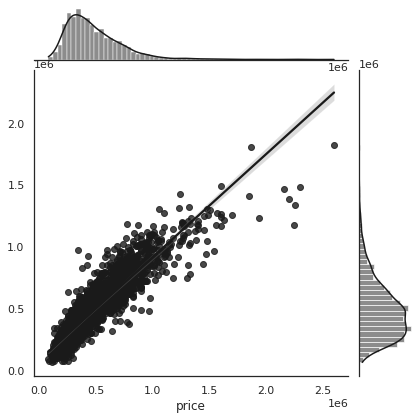

In [ ]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_Ridge1_predvl, kind="reg", color="k")

In summary, Linear models have performed almost with similar results in both regularized model and non-regularized models

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)

#predicting result over test data
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predvl= knn1.predict(X_val)


In [ ]:
#Model score and Deduction for each Model in a DataFrame
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)

knn1_vlscore=r2_score(y_val,y_knn1_predvl)
knn1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_knn1_predvl))
knn1_vlMSE=mean_squared_error(y_val, y_knn1_predvl)
knn1_vlMAE=mean_absolute_error(y_val, y_knn1_predvl)

knn1_df=pd.DataFrame({'Method':['knn1'],'Val Score':knn1_vlscore,'RMSE_vl': knn1_vlRMSE, 'MSE_vl': knn1_vlMSE, 'MAE_vl': knn1_vlMAE,'train Score':knn1_trscore,'RMSE_tr': knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr': knn1_trMAE})
Compa_df = pd.concat([Compa_df, knn1_df])

Compa_df

Method  Val Score  ...        MSE_tr        MAE_tr
0  Linear Reg Model1   0.830726  ...  1.044775e+10  68568.078133
0  Linear-Reg Lasso1   0.830747  ...  1.044950e+10  68571.404793
0  Linear-Reg Ridge1   0.830366  ...  1.047479e+10  68663.330987
0               knn1   0.371891  ...  1.088642e+08    950.405024

[4 rows x 9 columns]

Though KNN regressor performed well in training set, the performance score in validation set is very less. This shows that the model is overfitted in training set

### Support vector regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVR1 = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR1.fit(X_train, y_train)

y_SVR1_predtr= SVR1.predict(X_train)
y_SVR1_predvl= SVR1.predict(X_val)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
SVR1_trscore=r2_score(y_train,y_SVR1_predtr)
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_trMSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_trMAE=mean_absolute_error(y_train, y_SVR1_predtr)

SVR1_vlscore=r2_score(y_val,y_SVR1_predvl)
SVR1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_SVR1_predvl))
SVR1_vlMSE=mean_squared_error(y_val, y_SVR1_predvl)
SVR1_vlMAE=mean_absolute_error(y_val, y_SVR1_predvl)

SVR1_df=pd.DataFrame({'Method':['SVR1'],'Val Score':SVR1_vlscore,'RMSE_vl': SVR1_vlRMSE, 'MSE_vl': SVR1_vlMSE, 'MAE_vl': SVR1_vlMAE,'train Score':SVR1_trscore,'RMSE_tr': SVR1_trRMSE, 'MSE_tr': SVR1_trMSE, 'MAE_tr': SVR1_trMAE})
Compa_df = pd.concat([Compa_df, SVR1_df])

Compa_df

The above negative scores in SVR model is due to non-learning of the model in the training set which results in non-performance in validation set

In [ ]:
SVR2 = SVR(gamma='auto',C=0.1,kernel='linear')
SVR2.fit(X_train, y_train)

y_SVR2_predtr= SVR2.predict(X_train)
y_SVR2_predvl= SVR2.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
SVR2_trscore=r2_score(y_train,y_SVR2_predtr)
SVR2_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR2_predtr))
SVR2_trMSE=mean_squared_error(y_train, y_SVR2_predtr)
SVR2_trMAE=mean_absolute_error(y_train, y_SVR2_predtr)

SVR2_vlscore=r2_score(y_val,y_SVR2_predvl)
SVR2_vlRMSE=np.sqrt(mean_squared_error(y_val, y_SVR2_predvl))
SVR2_vlMSE=mean_squared_error(y_val, y_SVR2_predvl)
SVR2_vlMAE=mean_absolute_error(y_val, y_SVR2_predvl)

SVR2_df=pd.DataFrame({'Method':['SVR2'],'Val Score':SVR2_vlscore,'RMSE_vl': SVR2_vlRMSE, 'MSE_vl': SVR2_vlMSE, 'MAE_vl': SVR2_vlMAE,'train Score':SVR2_trscore,'RMSE_tr': SVR2_trRMSE, 'MSE_tr': SVR2_trMSE, 'MAE_tr': SVR2_trMAE})
Compa_df = pd.concat([Compa_df, SVR2_df])

Compa_df

The SVR model with modified parameters has not performed well with just ~0.45 in both training and validation data sets

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)

DT1_vlscore=r2_score(y_val,y_DT1_predvl)
DT1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT1_predvl))
DT1_vlMSE=mean_squared_error(y_val, y_DT1_predvl)
DT1_vlMAE=mean_absolute_error(y_val, y_DT1_predvl)

DT1_df=pd.DataFrame({'Method':['DT1'],'Val Score':DT1_vlscore,'RMSE_vl': DT1_vlRMSE, 'MSE_vl': DT1_vlMSE, 'MAE_vl': DT1_vlMAE,'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr': DT1_trMAE})
Compa_df = pd.concat([Compa_df, DT1_df])

Compa_df

Above performance of initial Decision tree model shows overfit in training set with 0.99 score and low performance in validation set

In [ ]:
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)

y_DT2_predtr= DT2.predict(X_train)
y_DT2_predvl= DT2.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_trMSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_trMAE=mean_absolute_error(y_train, y_DT2_predtr)

DT2_vlscore=r2_score(y_val,y_DT2_predvl)
DT2_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT2_predvl))
DT2_vlMSE=mean_squared_error(y_val, y_DT2_predvl)
DT2_vlMAE=mean_absolute_error(y_val, y_DT2_predvl)

DT2_df=pd.DataFrame({'Method':['DT2'],'Val Score':DT2_vlscore,'RMSE_vl': DT2_vlRMSE, 'MSE_vl': DT2_vlMSE, 'MAE_vl': DT2_vlMAE,'train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE, 'MSE_tr': DT2_trMSE, 'MAE_tr': DT2_trMAE})
Compa_df = pd.concat([Compa_df, DT2_df])

Compa_df

Above decision tree model with modified parameter has better performed on the training set and validation set compared to initial decision tree model.But overall decision tree has not performed well than linear regression models.

In [ ]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_DT2_predvl, kind="reg", color="k")

In summary, KNN regressor model and decision tree models have not performed well in comparison with linear regression models

### Ensemble techniques

#### Boosting and Bagging

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [ ]:
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)

GB1_vlscore=r2_score(y_val,y_GB1_predvl)
GB1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_GB1_predvl))
GB1_vlMSE=mean_squared_error(y_val, y_GB1_predvl)
GB1_vlMAE=mean_absolute_error(y_val, y_GB1_predvl)

GB1_df=pd.DataFrame({'Method':['GB1'],'Val Score':GB1_vlscore,'RMSE_vl': GB1_vlRMSE, 'MSE_vl': GB1_vlMSE, 'MAE_vl': GB1_vlMAE,'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE, 'MSE_tr': GB1_trMSE, 'MAE_tr': GB1_trMAE})
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

Gradient boosting model has provided good scores in both training and validation sets

In [ ]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)

BGG1_vlscore=r2_score(y_val,y_BGG1_predvl)
BGG1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_BGG1_predvl))
BGG1_vlMSE=mean_squared_error(y_val, y_BGG1_predvl)
BGG1_vlMAE=mean_absolute_error(y_val, y_BGG1_predvl)

BGG1_df=pd.DataFrame({'Method':['BGG1'],'Val Score':BGG1_vlscore,'RMSE_vl': BGG1_vlRMSE, 'MSE_vl':BGG1_vlMSE, 'MAE_vl': BGG1_vlMAE,'train Score':BGG1_trscore,'RMSE_tr': BGG1_trRMSE, 'MSE_tr': BGG1_trMSE, 'MAE_tr': BGG1_trMAE})
Compa_df = pd.concat([Compa_df, BGG1_df])

Compa_df

Bagging model also performed well in training and validation sets.There seems to be overfitting in training set. We need to analyse further by hypertuning

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predvl= RF1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)

RF1_vlscore=r2_score(y_val,y_RF1_predvl)
RF1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_RF1_predvl))
RF1_vlMSE=mean_squared_error(y_val, y_RF1_predvl)
RF1_vlMAE=mean_absolute_error(y_val, y_RF1_predvl)

RF1_df=pd.DataFrame({'Method':['RF1'],'Val Score':RF1_vlscore,'RMSE_vl': RF1_vlRMSE, 'MSE_vl':RF1_vlMSE, 'MAE_vl': RF1_vlMAE,'train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE, 'MSE_tr': RF1_trMSE, 'MAE_tr': RF1_trMAE})
Compa_df = pd.concat([Compa_df, RF1_df])

Compa_df

Random forest model has performed well in training and validation set. There is scope of further analysis on this model

##### Enseble models: in summary ensemble models have performed well on training and validation sets. These models will be selected for further analysis with hypertuning and feature selection

In [ ]:
#feature importance
rf_imp_feature_1=pd.DataFrame(RF1.feature_importances_, columns = ["Imp"], index = X_val.columns)
rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1['Imp'] = rf_imp_feature_1['Imp'].map('{0:.5f}'.format)
rf_imp_feature_1=rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1.Imp=rf_imp_feature_1.Imp.astype("float")

rf_imp_feature_1[:30].plot.bar(figsize=(10 ,10))

#First 20 features have an importance of 90.5% and first 30 have importance of 95.15
print("First 20 feature importance:\t",(rf_imp_feature_1[:20].sum())*100)
print("First 30 feature importance:\t",(rf_imp_feature_1[:30].sum())*100)

## Building Function/Pipeline for models

In [ ]:
rf_imp_feature_1[:30]

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def result (model,pipe_model,X_train_set,y_train_set,X_val_set,y_val_set):
    pipe_model.fit(X_train_set,y_train_set)
    #predicting result over test data
    y_train_predict= pipe_model.predict(X_train_set)
    y_val_predict= pipe_model.predict(X_val_set)

    trscore=r2_score(y_train_set,y_train_predict)
    trRMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    trMSE=mean_squared_error(y_train_set,y_train_predict)
    trMAE=mean_absolute_error(y_train_set,y_train_predict)

    vlscore=r2_score(y_val,y_val_predict)
    vlRMSE=np.sqrt(mean_squared_error(y_val,y_val_predict))
    vlMSE=mean_squared_error(y_val,y_val_predict)
    vlMAE=mean_absolute_error(y_val,y_val_predict)
    result_df=pd.DataFrame({'Method':[model],'val score':vlscore,'RMSE_val':vlRMSE,'MSE_val':vlMSE,'MSE_vl': vlMSE,
                          'train Score':trscore,'RMSE_tr': trRMSE,'MSE_tr': trMSE, 'MAE_tr': trMAE})  
    return result_df

Above function will run the model and return the r2 score,rmse,mse of the model

In [ ]:
#Creating empty dataframe to capture results
result_dff=pd.DataFrame()
pipe_LR = Pipeline([('LR', LinearRegression())])
result_dff=pd.concat([result_dff,result('LR',pipe_LR,X_train,y_train,X_val,y_val)])

pipe_knr = Pipeline([('KNNR', KNeighborsRegressor(n_neighbors=4,weights='distance'))])
result_dff=pd.concat([result_dff,result('KNNR',pipe_knr,X_train,y_train,X_val,y_val)])

pipe_DTR = Pipeline([('DTR', DecisionTreeRegressor())])
result_dff=pd.concat([result_dff,result('DTR',pipe_DTR,X_train,y_train,X_val,y_val)])

pipe_GBR = Pipeline([('GBR', GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22))])
result_dff=pd.concat([result_dff,result('GBR',pipe_GBR,X_train,y_train,X_val,y_val)])

pipe_BGR = Pipeline([('BGR', BaggingRegressor(n_estimators=50, oob_score= True,random_state=14))])
result_dff=pd.concat([result_dff,result('BGR',pipe_BGR,X_train,y_train,X_val,y_val)])

pipe_RFR = Pipeline([('RFR', RandomForestRegressor())])
result_dff=pd.concat([result_dff,result('RFR',pipe_RFR,X_train,y_train,X_val,y_val)])

result_dff

Above sequence of steps with pipeline function will run all the models and compile the scores in result_dff dataframe. We can see that the above 2 steps are concise instead of running individual models and compiling the scores as earlier.

#### We can clearly see gradient boosting is giving better result in comparison with other ensemble methods. Also the score of 0.82 on training set indicates no overfitting of the model

In [ ]:
#Storing results of initial data set - dff

result_ds1=result_dff.copy()
result_ds1

In [ ]:
df_pca = dff.drop(['price'], axis = 1)

In [ ]:
numerical_cols = df_pca.copy()

numerical_cols.shape

In [ ]:
# Let's first transform the entire X (independent variable data) to zscores. 
# We will create the PCA dimensions on this distribution.
from scipy.stats import zscore

# As PCA for Independent columns of Numerical types, let's pass numerical_cols (16 numerical features)
numerical_cols =  numerical_cols.apply(zscore)      

cov_matrix = np.cov(numerical_cols.T)
print('Covariance Matrix \n%s', cov_matrix)

***As we can see, near the value to 1, more the features related.***

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

In [ ]:
# Let's Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

In [ ]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  

# an array of variance explained by each 

# eigen vector... there will be 136 entries as there are 136 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  
# an array of cumulative variance. There will be 136 entries with 136 th entry cumulative reaching almost 100%

In [ ]:
print(len(var_explained))

print((cum_var_exp))

From above table we conclude that 96% variance is contributed by about 72 features

In [ ]:
plt.figure(figsize=(20, 20))
plt.bar(range(0,136), np.array(var_explained), alpha = 0.5, align='center', label='individual explained variance')

plt.step(range(0,136), np.array(cum_var_exp), where= 'mid', label='cumulative explained variance')
plt.locator_params(axis="x", nbins=34)
plt.locator_params(axis="y", nbins=35)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

##### 72 dimensions covering 97% variance in the data. So we can reduce to 72 dimension space

Now will recall the ensemble models from our initial run to check the feature selection using feature_imp_ from individual models

In [ ]:
#Building fuction to return the feature importances for the model
predictors = [x for x in dff.columns if x not in ['price']]

def modelfit(alg, dxtrain, dytrain, printFeatureImportance=True):
    #feature importance
    alg.fit(dxtrain,dytrain)
    alg_imp_feature_1=pd.DataFrame(alg.feature_importances_, columns = ["Imp"], index = predictors)
    alg_imp_feature_1.sort_values(by="Imp",ascending=False)
    alg_imp_feature_1['Imp'] = alg_imp_feature_1['Imp'].map('{0:.5f}'.format)
    alg_imp_feature_1=alg_imp_feature_1.sort_values(by="Imp",ascending=False)
    alg_imp_feature_1.Imp=alg_imp_feature_1.Imp.astype("float")
    
    feat_30list=list(alg_imp_feature_1.index[:30])
    

    
    if printFeatureImportance:
        alg_imp_feature_1[:30].plot.bar(figsize=(plotSizeX, plotSizeY))
        #First 20 features have an importance of 90.5% and first 30 have importance of 95.15
        print("First 25 feature importance:\t",(alg_imp_feature_1[:25].sum())*100)
        print("First 30 feature importance:\t",(alg_imp_feature_1[:30].sum())*100)
        
    return feat_30list

Will run above function with ensemble models: Gradient boosting, Random forest, Bagging

In [ ]:
#Gradient boost model
modelfit(GB1,X_train,y_train)

The top 30 features are covering about 98% in gradient boosting model. This is very good coverage for just 30% of the variables

In [ ]:
#Random Forest model
modelfit(RF1,X_train,y_train)